In [1]:
from numpy import *

In [16]:
def file2matrix(filename):
    fr = open(filename)
    
    numberOfLines = len(fr.readlines())
    
    matrix = zeros((numberOfLines,3))
    
    classLabelVector = []
    
    fr = open(filename)
    
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        
        matrix[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        #classLabelVector.append(listFromLine[-1])
        
        index += 1
        
    return matrix, classLabelVector

In [17]:
datingDataMatrix, datingLabels = file2matrix('datingTestSet2.txt')

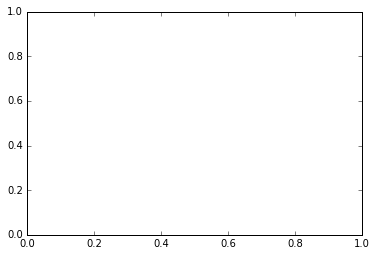

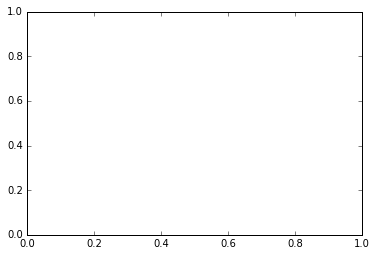

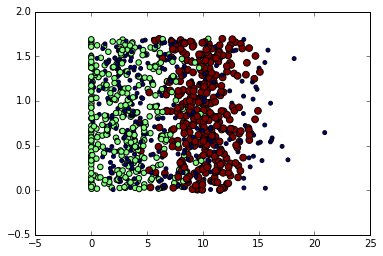

In [18]:
# Dibujar los valores
import matplotlib
import matplotlib.pyplot as plt

figure = plt.figure()
ax = figure.add_subplot(111)
ax.scatter(datingDataMatrix[:,1], datingDataMatrix[:,2], 15.0*array(datingLabels), 15.0*array(datingLabels))
plt.show()